In [1]:
#Supermarket sales analysis by Mark Aziz.  Email address: marcusazizas@gmail.com

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#read data in 
df = pd.read_csv('market.csv')

In [5]:
#check head
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
#check columns
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
#compare columns
df.describe

<bound method NDFrame.describe of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyl

In [8]:
#check if there is any null data
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
#check the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null object
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 132.9+ KB


In [12]:
#check the shape of the dataframe 1000 entries
df.shape

(1000, 17)

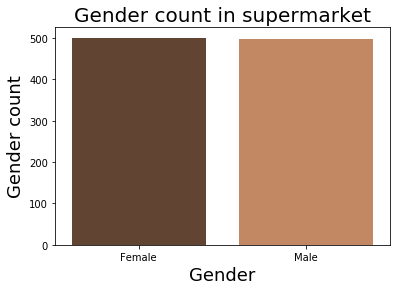

In [13]:
#mix of male and female in dataset
ax= sns.countplot('Gender', data=df , palette = 'copper')
ax.set_xlabel(xlabel= "Gender",fontsize=18)
ax.set_ylabel(ylabel = "Gender count", fontsize = 18)
ax.set_title(label = "Gender count in supermarket", fontsize = 20)
plt.show() 

Text(0, 0.5, 'Customer Count')

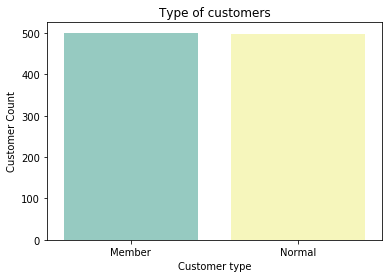

In [23]:
#what type of customers in the dataset and the distribution
ax = sns.countplot(x = "Customer type", data = df, palette = "Set3")
ax.set_title("Type of customers")
ax.set_xlabel("Customer type")
ax.set_ylabel("Customer Count")

In [15]:
#how much do we generate in sales from the different customer types
df.groupby(['Customer type']). agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


Text(0, 0.5, 'Customer Count')

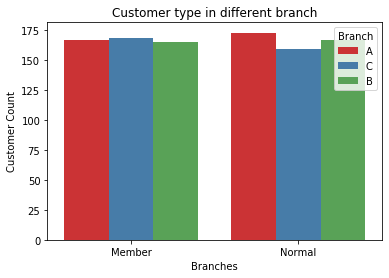

In [22]:
#distribution of different customer types across the three different supermarket branches
ax = sns.countplot(x = "Customer type", hue = "Branch", data = df, palette= "Set1")
ax.set_title(label = "Customer type in different branch")
ax.set_xlabel(xlabel = "Branches")
ax.set_ylabel(ylabel = "Customer Count")

Text(0, 0.5, ' Customer Count')

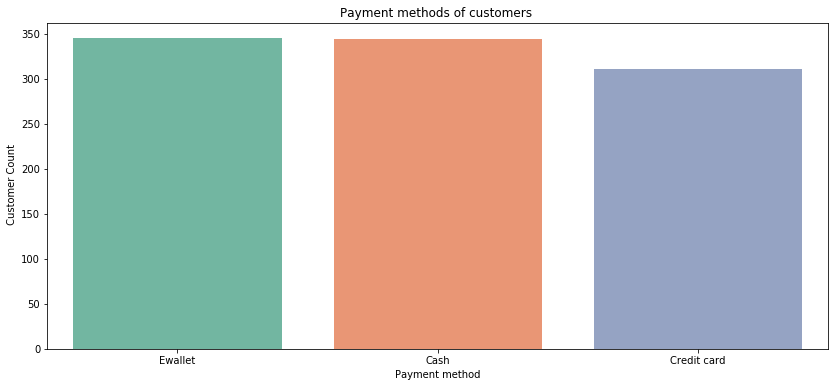

In [19]:
plt.figure(figsize = (14,6))
ax = sns.countplot(x = "Payment", data = df, palette = "Set2")
ax.set_title(label = "Payment methods of customers ")
ax.set_xlabel(xlabel = "Payment method")
ax.set_ylabel(ylabel = " Customer Count")

Text(0, 0.5, 'Peple Count')

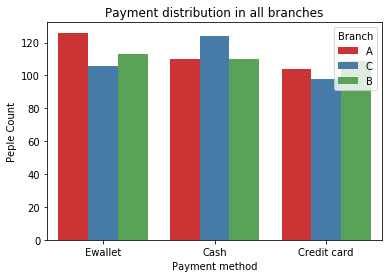

In [26]:
#how do people pay at the different branches
ax = sns.countplot(x="Payment", hue = "Branch", data = df, palette= "Set1")
ax.set_title(label = "Payment distribution in all branches")
ax.set_xlabel(xlabel = "Payment method")
ax.set_ylabel(ylabel = "Peple Count")

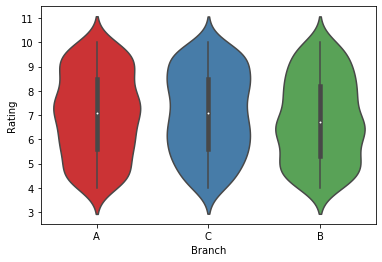

In [27]:
#What are the ratings at the different branches
sns.violinplot(x="Branch", y="Rating", data=df,palette='Set1')

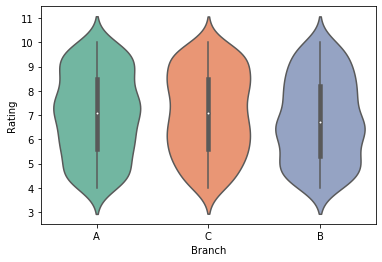

In [28]:
#violin plot of the branch versus rating
sns.violinplot(x="Branch", y="Rating", data=df,palette='Set2')

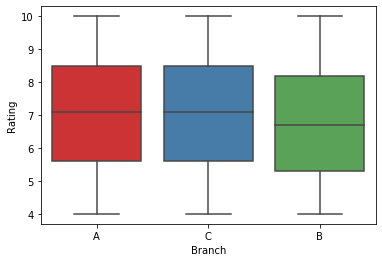

In [29]:
#boxplot of branch ratings
sns.boxplot(x="Branch", y="Rating", data=df,palette='Set1')

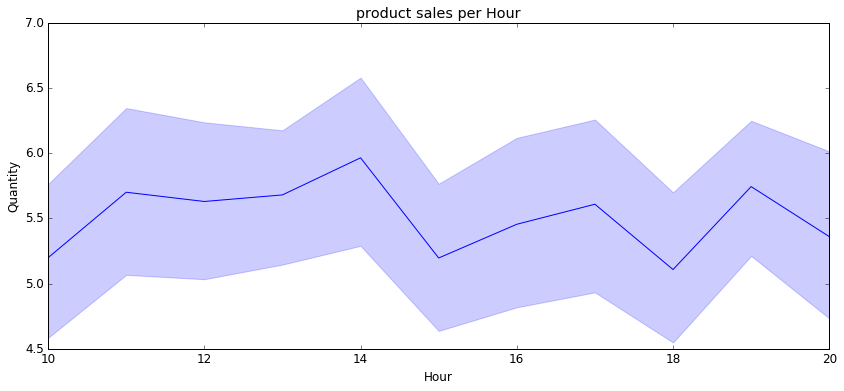

In [30]:
#a look at the popular times of the day where there are more sales - so 2pm is the highest and 6pm is the lowest
df["Time"]= pd.to_datetime(df["Time"])
df["Hour"]= (df["Time"]).dt.hour
plt.figure(figsize=(14,6))
plt.style.use('classic')
Time = sns.lineplot(x="Hour", y ="Quantity", data = df).set_title("product sales per Hour")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'Product Line')

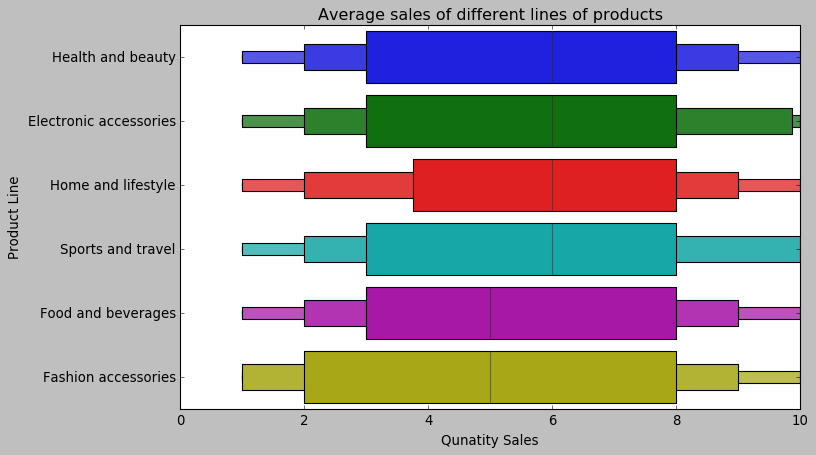

In [31]:
# which product line has the most sales = 
plt.figure(figsize=(10,6))
plt.style.use('classic')
ax = sns.boxenplot(x = "Quantity", y = "Product line", data = df,)
ax.set_title(label = "Average sales of different lines of products")
ax.set_xlabel(xlabel = "Qunatity Sales")
ax.set_ylabel(ylabel = "Product Line")

Text(0, 0.5, 'Product Line')

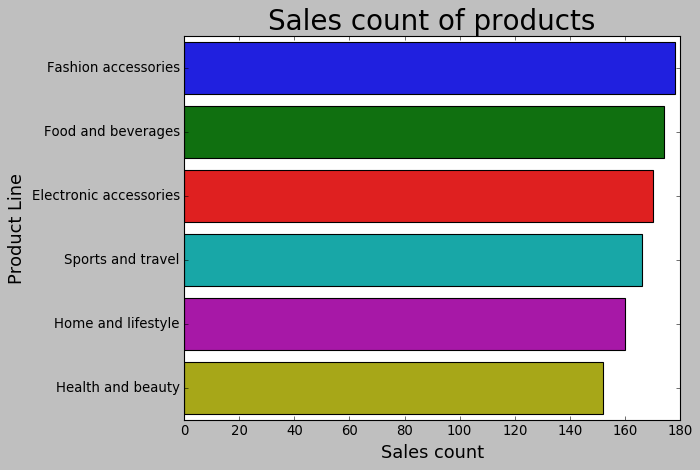

In [32]:
#Fashion accories has the highest sale count in the df and health and beauty sales has the lowest 
ax = sns.countplot(y='Product line', data=df, order = df['Product line'].value_counts().index)
ax.set_title(label = "Sales count of products", fontsize = 25)
ax.set_xlabel(xlabel = "Sales count", fontsize = 16)
ax.set_ylabel(ylabel= "Product Line", fontsize = 16)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'Product line')

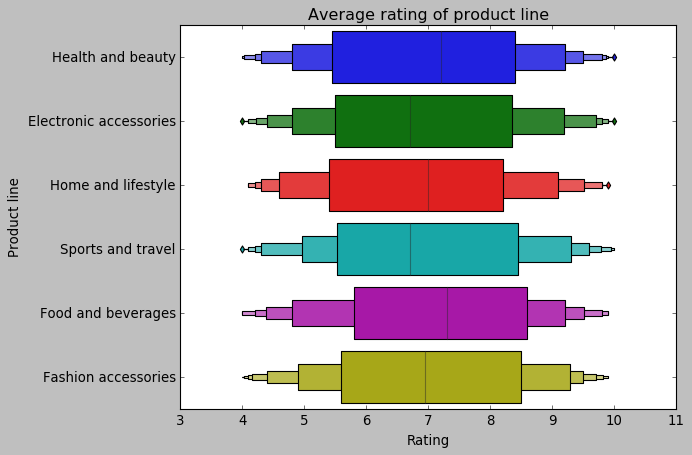

In [33]:
#food and beverages are getting the best ratings and electronic accesories the lowest
ax = sns.boxenplot(y = "Product line", x = "Rating", data = df)
ax.set_title("Average rating of product line")
ax.set_xlabel("Rating")
ax.set_ylabel("Product line")

Text(0, 0.5, 'Product Line')

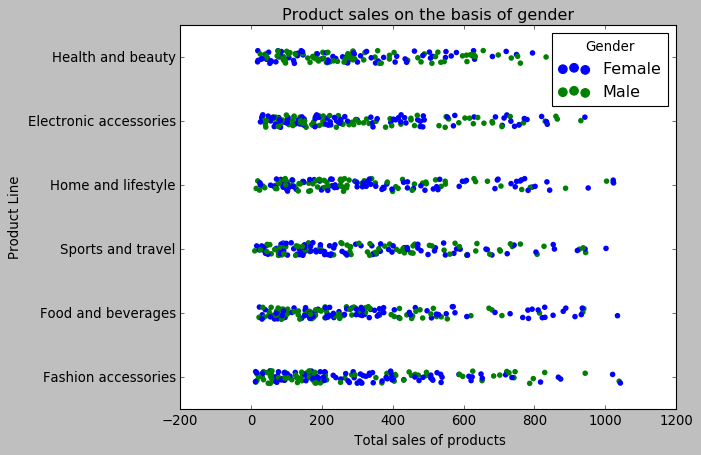

In [34]:
#strip plot to show the mix of product sales on gender.  more women buying fashion and beauty - the rest is quite mixed.
ax= sns.stripplot(y= "Product line", x = "Total", hue = "Gender", data = df)
ax.set_title(label = "Product sales on the basis of gender")
ax.set_xlabel(xlabel = " Total sales of products")
ax.set_ylabel(ylabel = "Product Line")

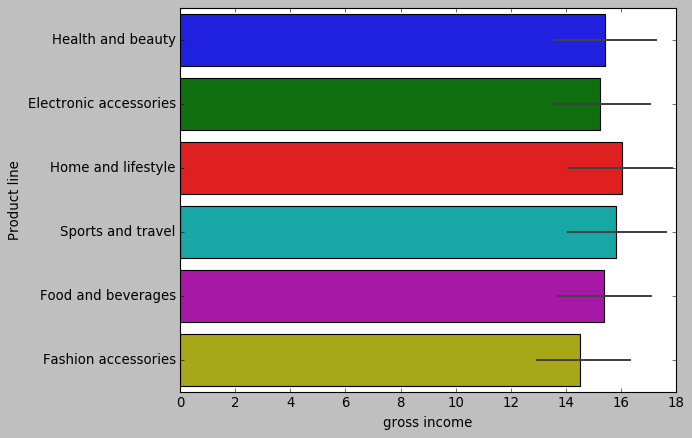

In [35]:
#home and lifestyle giving the most gross income and fashion accesories giving the least
ax = sns.barplot(y= "Product line", x = "gross income", data = df)

In [36]:
df["Time"]= pd.to_datetime(df["Time"])
df["Hour"]= (df["Time"]).dt.hour

In [38]:
df['Date']=pd.to_datetime(df['Date'].astype(str), format='%m/%d/%Y')

In [48]:
df['Year']=(df["Date"]).dt.year
df['Month']=(df["Date"]).dt.month

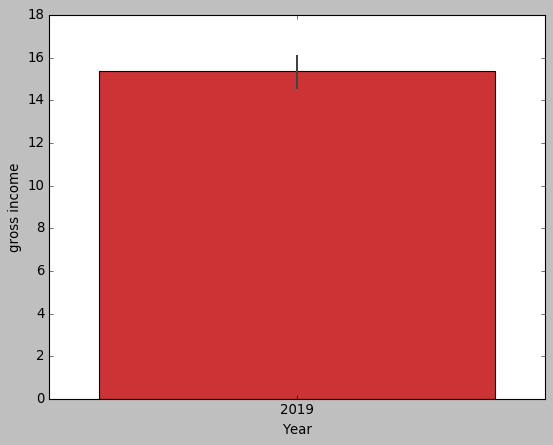

In [49]:
#dataframe only has one year of sales in
sns.barplot(x="Year", y="gross income", data=df,palette='Set1')

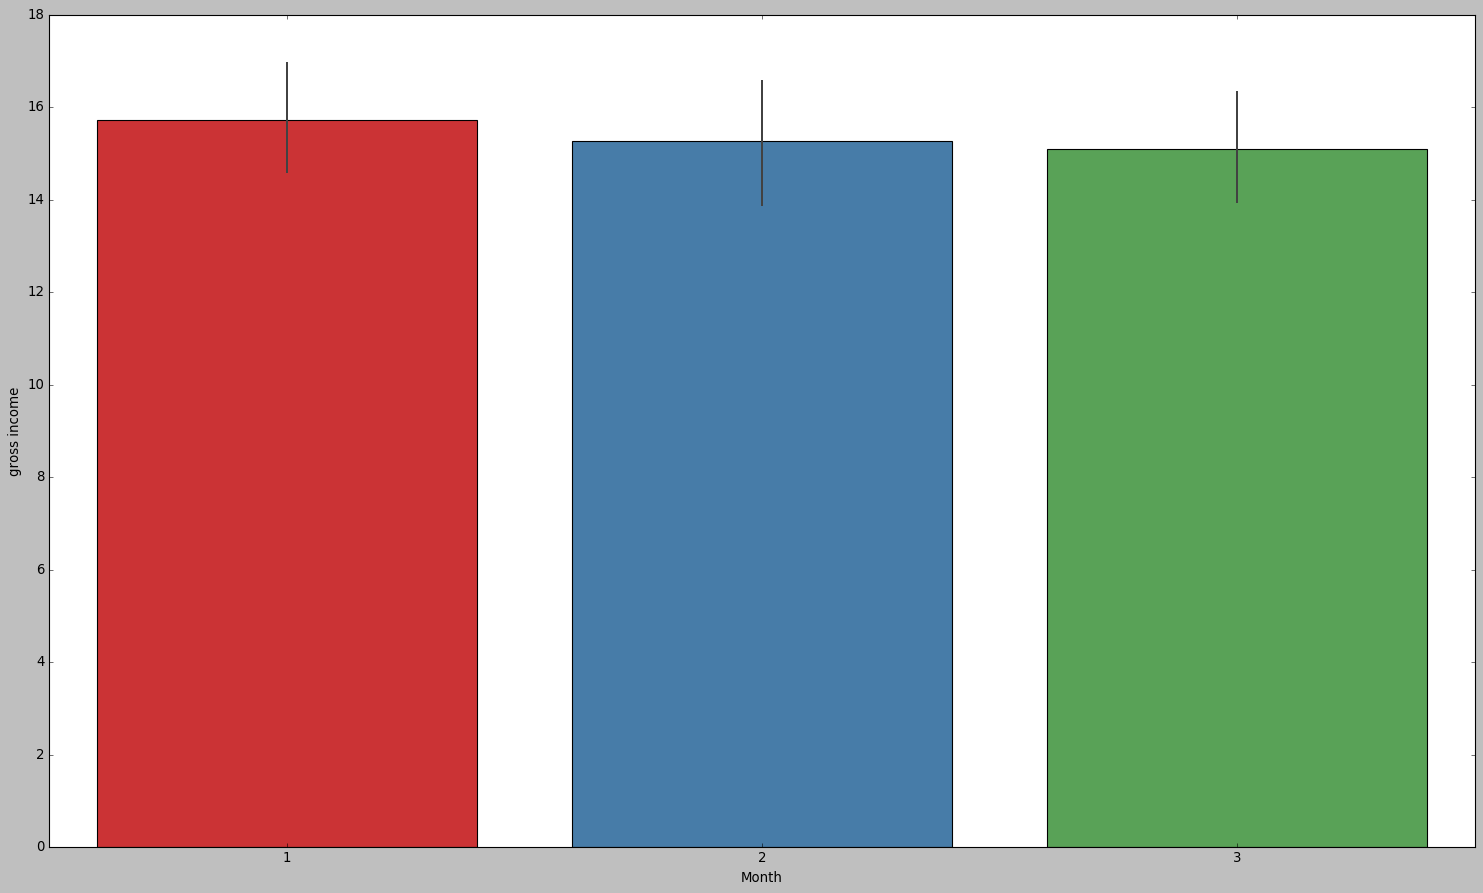

In [51]:
#theres only three months of data
plt.figure(figsize=(23,13))
plt.style.use('classic')
sns.barplot(x="Month", y="gross income", data=df,palette='Set1')

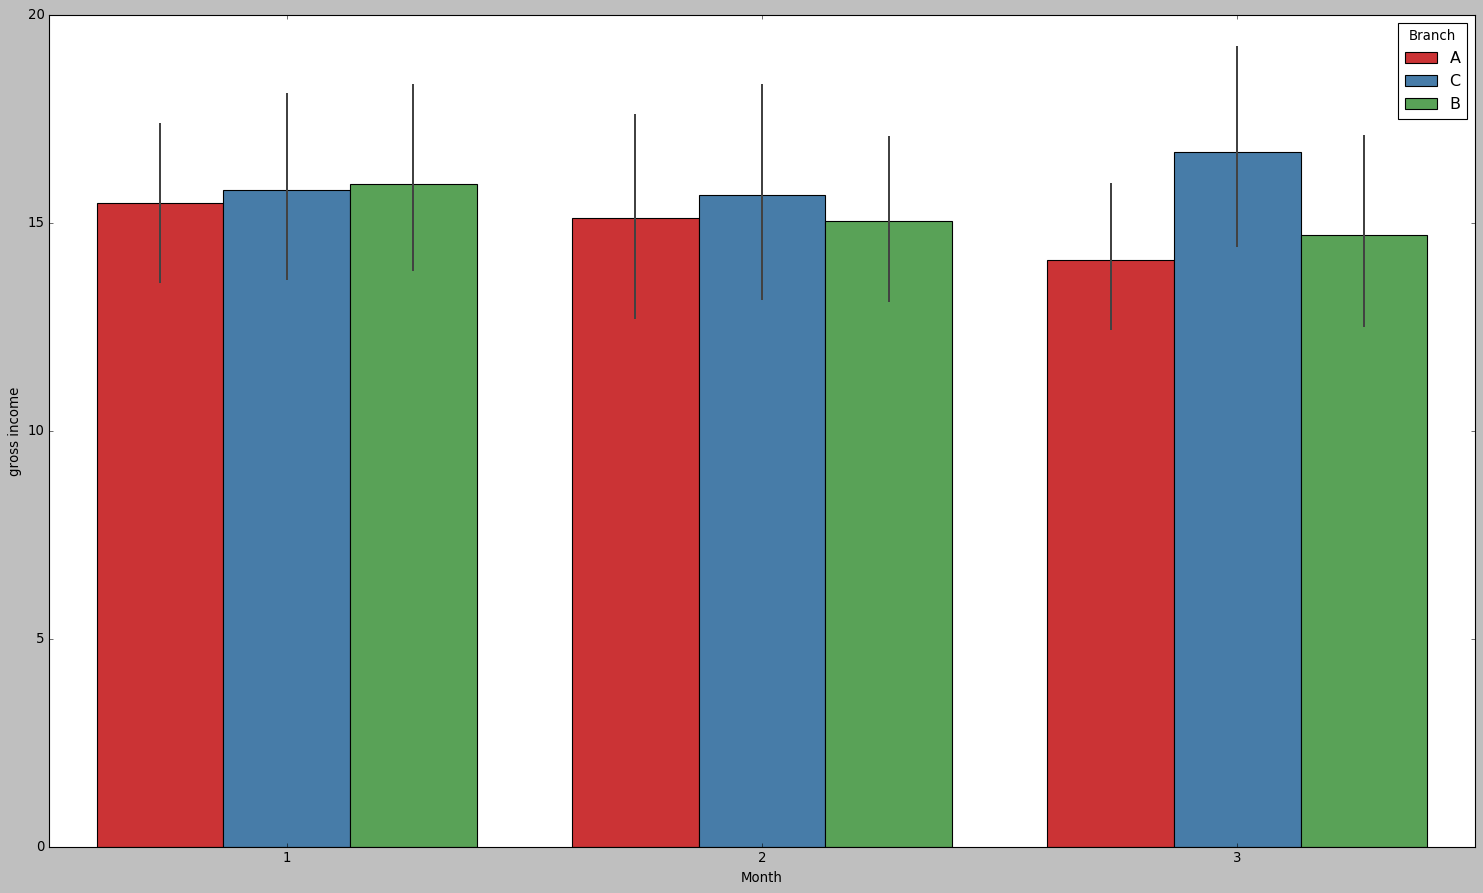

In [53]:
#distribution of gross income between the three branches of three months
plt.figure(figsize=(23,13))
plt.style.use('classic')
sns.barplot(x="Month", y="gross income", hue='Branch',data=df,palette='Set1')

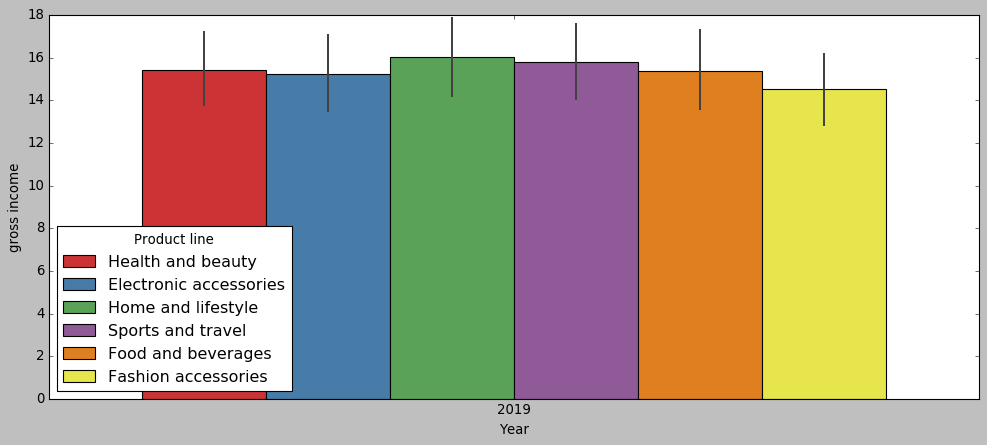

In [57]:
#barplot to show which sector is giving the highest sales.
plt.figure(figsize=(15,6))
plt.style.use('classic')
sns.barplot(x="Year", y="gross income", hue='Product line',data=df,palette='Set1')

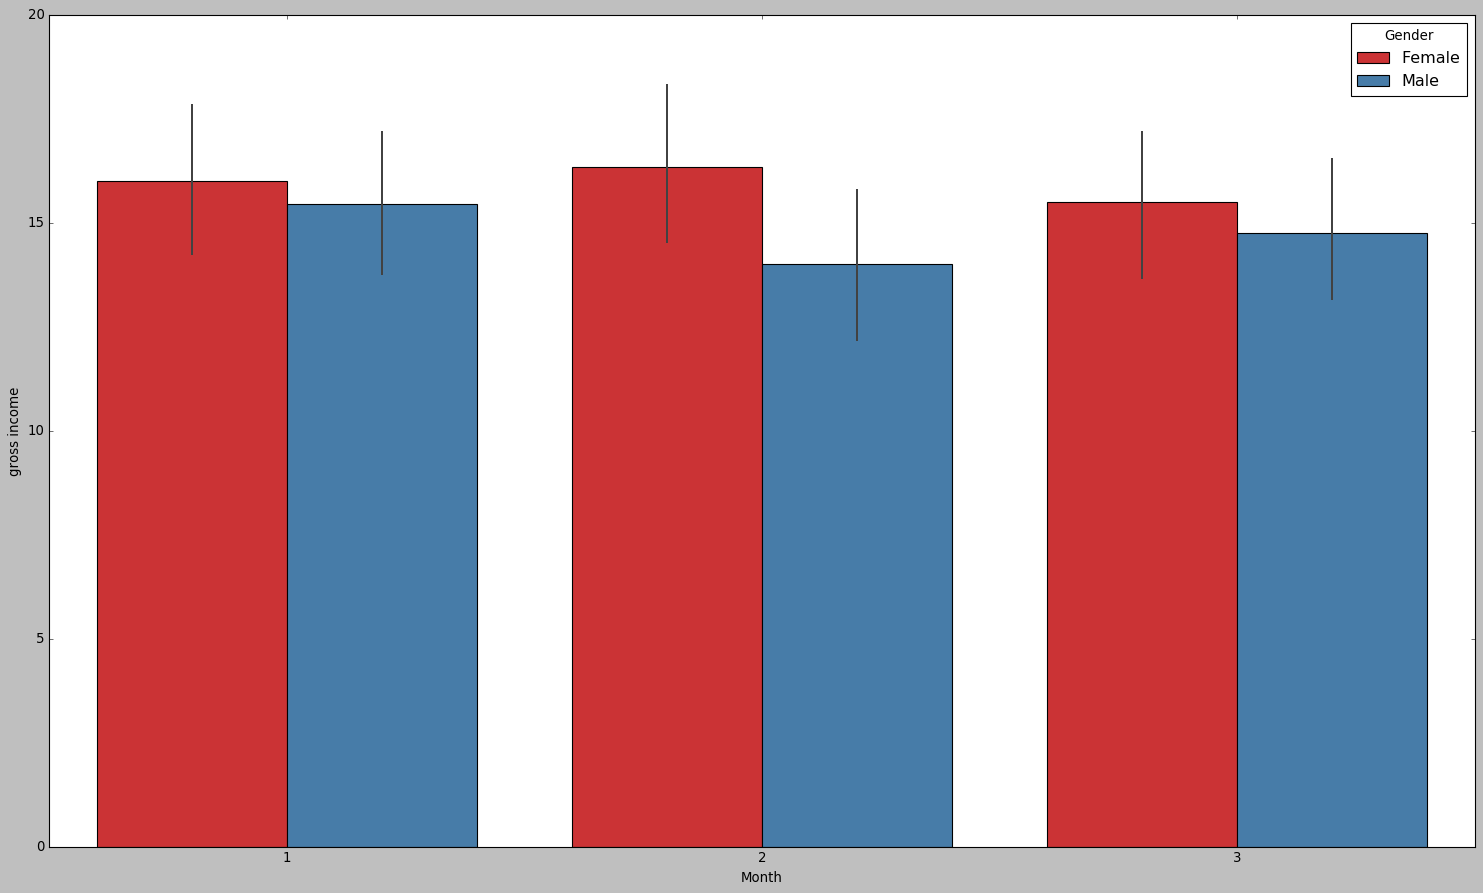

In [59]:
#females are giving the supermarket the most gross income
plt.figure(figsize=(23,13))
plt.style.use('classic')
sns.barplot(x="Month", y="gross income", hue='Gender',data=df,palette='Set1')

In [84]:
#groupby gender and product line and the gross income
meangrossincome = df[['Gender','Product line','gross income']].groupby(['Gender','Product line']).mean().sort_values(by='gross income',ascending=False)

In [85]:
meangrossincome

gross income
Gender Product line                        
Female Home and lifestyle         18.105411
       Food and beverages         17.550750
Male   Health and beauty          16.576165
       Sports and travel          16.207635
Female Sports and travel          15.462511
       Electronic accessories     15.363958
       Fashion accessories        15.097917
Male   Electronic accessories     15.080570
       Home and lifestyle         14.006488
       Fashion accessories        13.860915
Female Health and beauty          13.810258
Male   Food and beverages         13.023768

In [89]:
meangrossincome

gross income
Gender Product line                        
Female Home and lifestyle         18.105411
       Food and beverages         17.550750
Male   Health and beauty          16.576165
       Sports and travel          16.207635
Female Sports and travel          15.462511
       Electronic accessories     15.363958
       Fashion accessories        15.097917
Male   Electronic accessories     15.080570
       Home and lifestyle         14.006488
       Fashion accessories        13.860915
Female Health and beauty          13.810258
Male   Food and beverages         13.023768

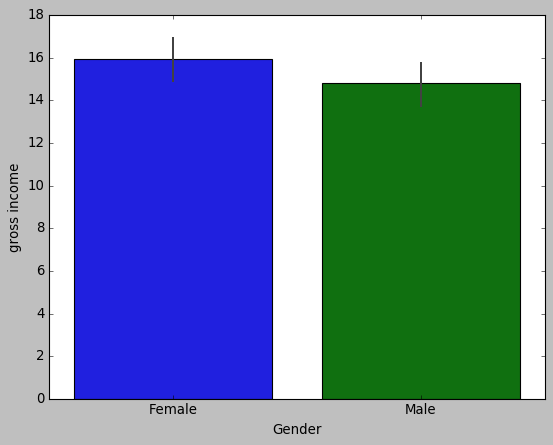

In [93]:
#Females giving the supermarket the most gross income.  Men spending more on health and beauty.
sns.barplot(x='Gender',y='gross income',data=df)

<Figure size 640x480 with 0 Axes>

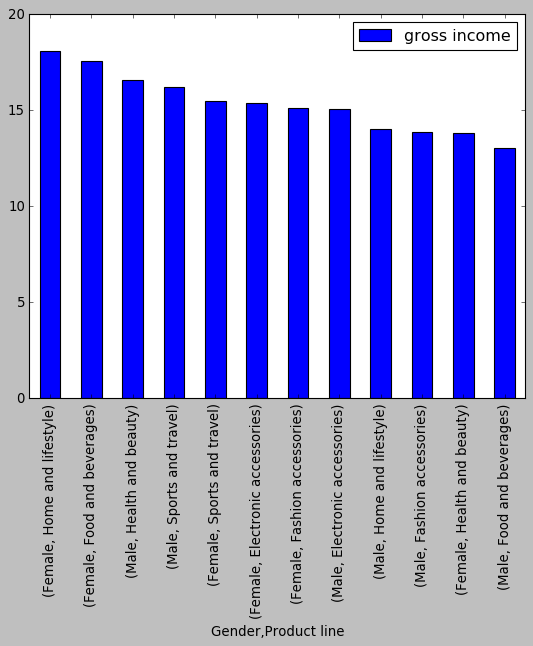

In [96]:
#Females spending on home and lifestyle 
plt.clf()
meangrossincome.plot(kind='bar')
plt.show()


In [100]:
meantotal = df[['Gender','Product line','Total']].groupby(['Gender','Product line']).mean().sort_values(by='Total',ascending=False)

<Figure size 640x480 with 0 Axes>

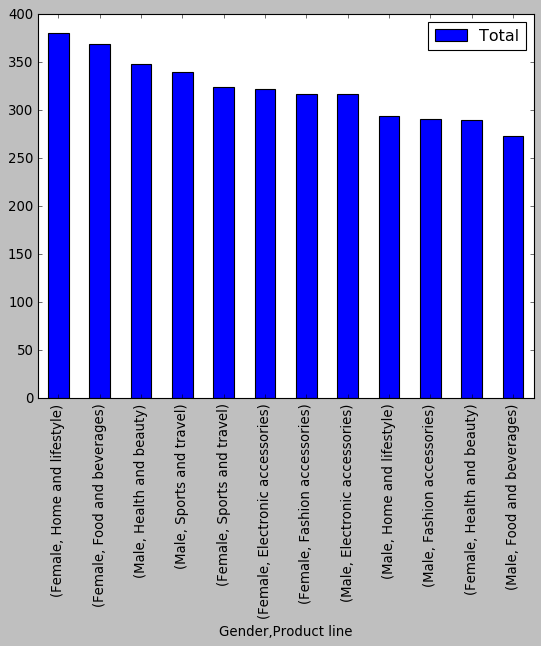

In [101]:
#barplot to show where the total sales are being spent similar to the gross income.
plt.clf()
meantotal.plot(kind='bar')
plt.show()